In [35]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
path= 'C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug'
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            
        
# data=data.drop(columns=["new_Median","new_sd","gumbel_Median","gumbel _sd"])

In [4]:
data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])

In [5]:
print(data.shape)
print(data.columns)

(32620, 14)
Index(['proteinName', 'peptideSeq', 'old_Rsquared', 'new_Rsquared', 'NDP',
       'rateconstant', 'sigma', 'Abundance', 'MassToCharge', 'RMSE',
       'selected_A1A0_count', ' selected_A2A0_count', ' selected_A2A1_count',
       'Protein'],
      dtype='object')


In [6]:
data=data[data.NDP >=4]
print(data.shape)

(29723, 14)


In [18]:
# temp_oldrsquared=data[data.old_Rsquared>=0.9]
# print("selected_A1A0_count",temp_oldrsquared["selected_A1A0_count"].sum())
# print("selected_A2A0_count",temp_oldrsquared[" selected_A2A0_count"].sum())
# print("selected_A1A0_count",temp_oldrsquared["selected_A1A0_count"].sum())

In [28]:
temp_newrsquared=data[(data.new_Rsquared>=0.8) & (data.old_Rsquared<0.8)]
print("selected_A1A0_count",temp_newrsquared["selected_A1A0_count"].sum())
print("selected_A2A0_count",temp_newrsquared[" selected_A2A0_count"].sum())
print("selected_A2A1_count",temp_newrsquared[" selected_A2A1_count"].sum())

selected_A1A0_count 15864.0
selected_A2A0_count 11412.0
selected_A2A1_count 12125.0


In [32]:
count=[temp_newrsquared["selected_A1A0_count"].sum(),temp_newrsquared[" selected_A2A0_count"].sum(),
       temp_newrsquared[" selected_A2A1_count"].sum()]
x=["A1/A0","A2/A0","A2/A1"]

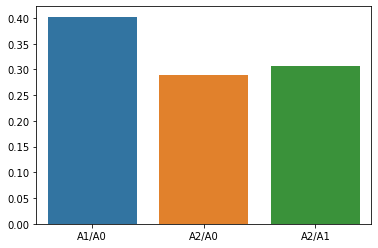

In [52]:
# plt.bar(x,count/sum(count),color=['g','b','r'],width=0.4)
ax = sns.barplot(x=x, y=count/sum(count),dodge=False)